In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Machine Learning Microgrid Data.csv')

### Encode Categorical Columns

<img src="https://miro.medium.com/max/386/1*Yp6r7m82IoSnnZDPpDpYNw.png" width="640">

Let's one-hot encode categorical columns

In [ ]:
possible_combinations = list(df['Output power (Sources)'].unique())
possible_combinations

['Battery',
 'Diesel Wind',
 'Diesel',
 'Wind',
 'Battery Wind',
 'Diesel Solar Wind',
 'Battery Diesel',
 'Battery Diesel Solar',
 'Battery Diesel Solar Wind',
 'Battery Solar Wind',
 'Battery Solar',
 'Solar Wind',
 'Solar']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
df['Output power (Sources)'] = le.fit_transform(df['Output power (Sources)'])

In [ ]:
list(df['Output power (Sources)'].unique())

[0, 9, 7, 12, 6, 8, 1, 2, 3, 5, 4, 11, 10]

In [ ]:
df.head()

,Time,Solar Power (MW),Diesel Generator Power (MW),Battery Power (MW),Wind Power (MW),Load Profile (MW),Output power (MW),Output power (Sources)
0,0.000000e+00,-0.481781,-13.622404,1,-9.672488,0.9,1.0,0
1,3.155444e-30,-0.481781,-13.622404,1,-9.672488,0.9,1.0,0
2,6.155136e-08,-0.474034,-13.893489,1,-9.516805,0.9,1.0,0
3,1.846541e-07,-0.458889,-14.413524,1,-9.212482,0.9,1.0,0
4,3.077568e-07,-0.444237,-14.900612,1,-8.918097,0.9,1.0,0


In [ ]:
le.inverse_transform([0, 9, 7, 12, 6, 8, 1, 2, 3, 5, 4, 11, 10])

array(['Battery', 'Diesel Wind', 'Diesel', 'Wind', 'Battery Wind',
       'Diesel Solar Wind', 'Battery Diesel', 'Battery Diesel Solar',
       'Battery Diesel Solar Wind', 'Battery Solar Wind', 'Battery Solar',
       'Solar Wind', 'Solar'], dtype=object)

In [ ]:
input_cols = ['Solar Power (MW)', 'Diesel Generator Power (MW)', 'Battery Power (MW)', 'Wind Power (MW)', 'Load Profile (MW)']

In [ ]:
regression_target_cols = ['Output power (MW)']
classification_target_cols = ['Output power (Sources)']

In [ ]:
inputs = df[input_cols]
regression_targets = df[regression_target_cols]
classification_targets = df[classification_target_cols]

In [ ]:
numeric_cols = ['Solar Power (MW)', 'Diesel Generator Power (MW)', 'Battery Power (MW)', 'Wind Power (MW)', 'Load Profile (MW)']

In [ ]:
from sklearn.model_selection import train_test_split
XR_train, XR_test, yr_train, yr_test = train_test_split(
 inputs, regression_targets, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
XC_train, XC_test, yc_train, yc_test = train_test_split(
 inputs, classification_targets, test_size=0.33, random_state=42)

###Neural network Regressor

####Model design

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
NN_regression_model = tf.keras.Sequential()
NN_regression_model.add(layers.Dense(80, activation='relu', input_shape=(inputs.shape[1],)) )
NN_regression_model.add(layers.Dense(40, activation='relu'))
NN_regression_model.add(layers.Dense(1))

NN_regression_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

NN_regression_model.build()

In [ ]:
NN_regression_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                480       
                                                                 
 dense_1 (Dense)             (None, 40)                3240      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 3,761
Trainable params: 3,761
Non-trainable params: 0
_________________________________________________________________


####Train model

In [ ]:
import time
t0 = time.time()

NN_regression_history = NN_regression_model.fit(XR_train, # Training features
          yr_train, # Training labels
          epochs=200,   # We'll stop after 10 epochs
          batch_size=10, # 
          validation_split=0.10, # Use 10% of data to evaluate the loss. (val_loss)
          verbose=1, #
          )
print("Training took "+str(time.time() - t0)+" seconds")

Epoch 1/200
250/250 [==============================] - 4s 3ms/step - loss: 0.6689 - accuracy: 0.3985 - val_loss: 0.1177 - val_accuracy: 0.4353
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.4121 - val_loss: 0.0538 - val_accuracy: 0.4353
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0480 - accuracy: 0.4117 - val_loss: 0.0247 - val_accuracy: 0.4353
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0368 - accuracy: 0.4113 - val_loss: 0.0376 - val_accuracy: 0.4353
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.4105 - val_loss: 0.0427 - val_accuracy: 0.4353
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0379 - accuracy: 0.4105 - val_loss: 0.0163 - val_accuracy: 0.4353
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 0.0268 - accuracy: 0.4117 - val_loss: 0.0168 - val_accuracy: 0.4353

In [ ]:
NN_regression_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

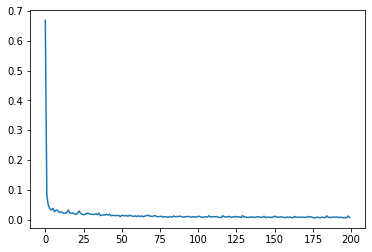

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NN_regression_history.history["loss"])
plt.show()

####Save model

In [ ]:
NN_regression_model.save("Optimal_Scheduling_Regression.h5")

In [ ]:
NN_regression_model.save("Optimal_Scheduling_Regression.model")

####Test model


In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

y_pred = (NN_regression_model.predict(XR_test))

In [ ]:
y_pred

array([[1.0147332],
       [1.6194265],
       [1.6330886],
       ...,
       [1.0235753],
       [1.8622198],
       [4.4048505]], dtype=float32)

###NN classification

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
NN_classification_model = tf.keras.Sequential()
NN_classification_model.add(layers.Dense(80, activation='relu', input_shape=(inputs.shape[1],)) )
NN_classification_model.add(layers.Dense(40, activation='relu'))
NN_classification_model.add(layers.Dense(1))
NN_classification_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NN_classification_model.build()

####Train model

In [ ]:
import time
t0 = time.time()

NN_classification_history = NN_classification_model.fit(XC_train, # Training features
          yc_train, # Training labels
          epochs=200,   # We'll stop after 10 epochs
          batch_size=10, # 
          validation_split=0.10, # Use 10% of data to evaluate the loss. (val_loss)
          verbose=1, #
          )
print("Training took "+str(time.time() - t0)+" seconds")

Epoch 1/200
250/250 [==============================] - 2s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 2/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 3/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 5/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 6/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accuracy: 0.4065 - val_loss: 3.8164e-07 - val_accuracy: 0.4317
Epoch 7/200
250/250 [==============================] - 1s 3ms/step - loss: 3.9826e-07 - accura

In [ ]:
NN_classification_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

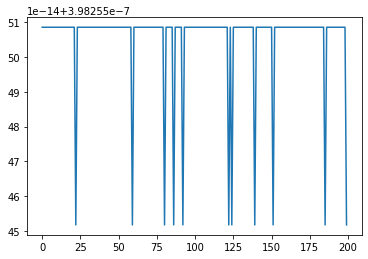

In [ ]:
import matplotlib.pyplot as plt
plt.plot(NN_classification_history.history["loss"])
plt.show()

####Save model

In [ ]:
NN_classification_model.save("Optimal_Scheduling_Classification.h5")

In [ ]:
NN_classification_model.save("Optimal_Scheduling_Classification.model")

####Test model


In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score

y_pred = (NN_classification_model.predict(XC_test) > 0.5).astype("int32")

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
y_true = yc_test
print('Neural Network Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

Neural Network Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[531,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [299,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 78,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [180,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 47,  36,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 32,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yc_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.99      0.57       538
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00       299
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00       180
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00         1

    accuracy                           0.39      1367
   macro avg       0.03      0.08      0.04      1367
weighted avg       0.16      0.39      0.22      1367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

###Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

####Train model

In [ ]:
DTR_model = DecisionTreeRegressor()
import time
t0 = time.time()
DTR_model.fit(XR_train, yr_train)
print("Training took "+str(time.time() - t0)+" seconds")

Training took 0.010987997055053711 seconds


####Test model

In [ ]:
# make predictions for test data
DTR_predictions = DTR_model.predict(XR_test)

In [ ]:
DTR_predictions

array([1.        , 1.5022245 , 1.62006273, ..., 1.        , 1.86892436,
       4.38017881])

###Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

####Train model

In [ ]:
DTC_model = DecisionTreeClassifier()
import time
t0 = time.time()
DTC_model.fit(XC_train, yc_train)
print("Training took "+str(time.time() - t0)+" seconds")

Training took 0.008457422256469727 seconds


####Test model

In [ ]:
# make predictions for test data
y_pred = DTC_model.predict(XC_test)
DTC_predictions = [round(value) for value in y_pred]

In [ ]:
from sklearn.metrics import accuracy_score
# evaluate predictions
accuracy = accuracy_score(yc_test, DTC_predictions)
print("Decion tree Test accuracy: %.2f%%" % (accuracy * 100.0))

Decion tree Test accuracy: 99.56%


In [ ]:
y_true = yc_test
print('Decision tree Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, DTC_predictions)
cm

Decision tree Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[538,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 297,   0,   0,   0,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0,  78,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  83,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  31,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yc_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           2       0.96      1.00      0.98        23
           3       1.00      1.00      1.00        14
           4       1.00      0.99      1.00       299
           5       1.00      1.00      1.00        78
           6       1.00      1.00      1.00       180
           7       1.00      1.00      1.00        83
           8       0.97      0.97      0.97        32
           9       0.00      0.00      0.00         1
          10       1.00      0.99      0.99       100
          11       0.90      1.00      0.95        18
          12       0.00      0.00      0.00         1

    accuracy                           1.00      1367
   macro avg       0.82      0.83      0.82      1367
weighted avg       0.99      1.00      0.99      1367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Gradient Boosting machine | Regressor

In [ ]:
from xgboost import XGBRegressor

####Train model

In [ ]:
# fit model no training data
XGBR_model = XGBRegressor()
import time
t0 = time.time()
XGBR_model.fit(XR_train, yr_train)
print("Training took "+str(time.time() - t0)+" seconds")

[12:22:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training took 0.45526671409606934 seconds


####Test model

In [ ]:
# make predictions for test data
y_pred = XGBR_model.predict(XR_test)

In [ ]:
y_pred

array([1.0037758, 1.5994779, 1.6040826, ..., 1.0022085, 1.8299105,
       4.2918715], dtype=float32)

In [ ]:
yr_test

,Output power (MW)
2351,1.000000
1966,1.501902
1582,1.619953
296,6.372317
149,1.000000
...,...
1427,1.839589
2304,1.000000
3966,1.000000
1413,1.870826


###Gradient Boosting machine | Classifier

In [ ]:
from xgboost import XGBClassifier

####Train model

In [ ]:
# fit model no training data
XGBC_model = XGBClassifier()
import time
t0 = time.time()
XGBC_model.fit(XC_train, yc_train)
print("Training took "+str(time.time() - t0)+" seconds")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training took 0.6716763973236084 seconds


####Test model

In [ ]:
# make predictions for test data
y_pred = XGBC_model.predict(XC_test)
predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(yc_test, predictions)
print("XGB Classifier Test accuracy: %.2f%%" % (accuracy * 100.0))

XGB Classifier Test accuracy: 99.41%


In [ ]:
y_true = yc_test
print('XGB Classifier Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, DTC_predictions)
cm

XGB Classifier Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[538,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  14,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 297,   0,   0,   0,   1,   0,   0,   1,   0],
       [  0,   0,   0,   0,  78,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  83,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  31,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  18,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yc_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           2       0.96      1.00      0.98        23
           3       1.00      0.86      0.92        14
           4       1.00      1.00      1.00       299
           5       0.99      1.00      0.99        78
           6       1.00      1.00      1.00       180
           7       1.00      1.00      1.00        83
           8       0.91      0.94      0.92        32
           9       0.00      0.00      0.00         1
          10       0.99      1.00      1.00       100
          11       1.00      0.94      0.97        18
          12       0.00      0.00      0.00         1

    accuracy                           0.99      1367
   macro avg       0.82      0.81      0.82      1367
weighted avg       0.99      0.99      0.99      1367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Random forest | Classifier

##Train model

In [ ]:
from sklearn.ensemble import RandomForestClassifier


Random_Forest_Classifier = RandomForestClassifier(max_depth=2, random_state=0)

Random_Forest_Classifier.fit(XC_train, yc_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=2, random_state=0)

####Test model

In [ ]:
# make predictions for test data
y_pred = Random_Forest_Classifier.predict(XC_test)
RFC_predictions = [round(value) for value in y_pred]

In [ ]:
# evaluate predictions
accuracy = accuracy_score(yc_test, RFC_predictions)
print("Random Forest Classifier Test accuracy: %.2f%%" % (accuracy * 100.0))

Random Forest Classifier Test accuracy: 80.25%


In [ ]:
y_true = yc_test
print('Random Forest Classifier Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, RFC_predictions)
cm

Random Forest Classifier Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[538,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  23,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  14,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 299,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   4,   0,  74,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 180,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,  80,   0,   0,   0,   0,   0],
       [  0,   0,   0,  20,   0,   0,  12,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 100,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(yc_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       538
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        14
           4       0.63      1.00      0.77       299
           5       0.00      0.00      0.00        78
           6       0.70      1.00      0.82       180
           7       0.87      0.96      0.91        83
           8       0.00      0.00      0.00        32
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00       100
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00         1

    accuracy                           0.80      1367
   macro avg       0.27      0.33      0.29      1367
weighted avg       0.67      0.80      0.73      1367



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
